In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [125]:
file = pd.read_csv('vgsales.csv')
file.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 결측치 확인

In [126]:
len(file)

16598

In [127]:
file.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [128]:
# 결측치 있는 행들만 모두 추출
file[file.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [129]:
# 열 이름 담아 결측치 나온 열 확인
cols = []
for col in file:
    cols.append(col)

file[cols].isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

- Year과 Publisher에서 결측치 발생 -> 어떻게 처리해야 할까
- 일단 Year은 최빈값으로, Publisher은 '결측'이라는 문구로 변환
###### 연습용 예제니까 단순히 이렇게 변형한 것이고, 실제로는 이러면 xxxxx!!

In [130]:
file[['Year']].describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [137]:
file = file.fillna({'Year': 2006, 'Publisher': '결측'})

In [139]:
file.isnull().sum()

# 결측치가 사라짐을 확인 가능

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [145]:
file.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 중복된 데이터 확인

In [142]:
file.duplicated().sum()

0

## 이상치

In [143]:
# z-score
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

In [152]:
file.loc[outlier(file, 'Global_Sales', 15)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [153]:
# IQR

def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr) | (df[col] > q3+1.5*iqr)]

outlier2(file, 'Global_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
1888,1890,Sonic & Sega All-Stars Racing,DS,2010.0,Racing,Sega,0.44,0.54,0.00,0.11,1.09
1889,1891,Skylanders Giants,PS3,2012.0,Action,Activision,0.35,0.52,0.00,0.22,1.09
1890,1892,Endless Ocean,Wii,2007.0,Adventure,Nintendo,0.44,0.47,0.09,0.09,1.09
1891,1893,NFL Blitz 2000,PS,1998.0,Sports,Midway Games,0.60,0.41,0.00,0.07,1.09


## 정규화

In [156]:
# Standardization 이용

num_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
file_standard = (file[num_cols] - file[num_cols].mean()) / file[num_cols].std()
file_standard.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,50.478988,57.135209,11.937698,44.604742,52.862433
1,35.283374,6.793984,21.766640,3.828109,25.531734
2,19.083698,25.197026,12.002362,17.296594,22.689341
3,18.961252,21.496629,10.353428,15.440700,20.875869
4,13.475647,17.301527,32.791869,5.047696,19.827656


In [157]:
file_standard.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04
mean,-3.145335e-14,-6.160151e-14,1.270088e-14,4.582867e-14,-5.162491e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.240761e-01,-2.901982e-01,-2.514840e-01,-2.548567e-01,-3.391840e-01
25%,-3.240761e-01,-2.901982e-01,-2.514840e-01,-2.548567e-01,-3.070303e-01
50%,-2.261189e-01,-2.506217e-01,-2.514840e-01,-2.018312e-01,-2.362920e-01
75%,-3.020441e-02,-7.252779e-02,-1.221558e-01,-4.275459e-02,-4.336942e-02
max,5.047899e+01,5.713521e+01,3.279187e+01,5.579313e+01,5.286243e+01


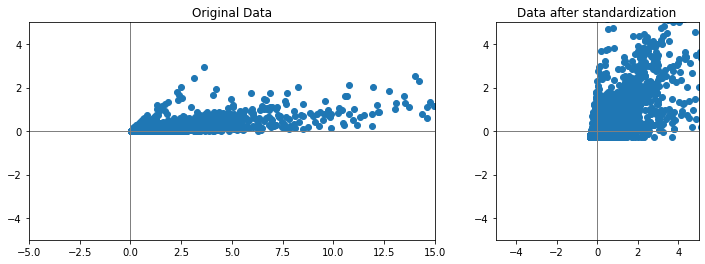

In [160]:
# Standardization 정규화 분포 확인

fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={
    'width_ratios': [2, 1]})

axs[0].scatter(file['Global_Sales'], file['Other_Sales'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')



axs[1].scatter(file_standard['Global_Sales'], file_standard['Other_Sales'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

## 원-핫 인코딩

In [167]:
print(file['Genre'].head())

genre = pd.get_dummies(file['Genre'])
genre.head()

0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
Name: Genre, dtype: object


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0


- 왜 genre의 종류 많아졌지 ??

In [169]:
# file과 genre 합쳐주기
pd.set_option('display.max_columns', None)

file = pd.concat([file, genre], axis=1)
file.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [170]:
print(file['Platform'].head())

platform = pd.get_dummies(file['Platform'])
platform.head()

   Platform  Platform  Platform
0       Wii         0         0
1       NES         1         1
2       Wii         0         0
3       Wii         0         0
4        GB         0         0


,Platform,Platform,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


platform은 열이 너무 많아서 대체하지 않았다!

In [171]:
file.drop(['Genre'], axis=1, inplace=True)
file.head()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 구간화

In [176]:
data = file['Global_Sales']

ctg = pd.cut(data, bins=6)
ctg

0          (68.952, 82.74]
1         (27.587, 41.375]
2         (27.587, 41.375]
3         (27.587, 41.375]
4         (27.587, 41.375]
               ...        
16593    (-0.0727, 13.798]
16594    (-0.0727, 13.798]
16595    (-0.0727, 13.798]
16596    (-0.0727, 13.798]
16597    (-0.0727, 13.798]
Name: Global_Sales, Length: 16598, dtype: category
Categories (6, interval[float64]): [(-0.0727, 13.798] < (13.798, 27.587] < (27.587, 41.375] < (41.375, 55.163] < (55.163, 68.952] < (68.952, 82.74]]

In [179]:
ctg.value_counts().sort_index()

(-0.0727, 13.798]    16563
(13.798, 27.587]        25
(27.587, 41.375]         9
(41.375, 55.163]         0
(55.163, 68.952]         0
(68.952, 82.74]          1
Name: Global_Sales, dtype: int64

In [180]:
ctg = pd.qcut(data, q=5)
ctg

0                       (0.61, 82.74]
1                       (0.61, 82.74]
2                       (0.61, 82.74]
3                       (0.61, 82.74]
4                       (0.61, 82.74]
                     ...             
16593    (0.009000000000000001, 0.05]
16594    (0.009000000000000001, 0.05]
16595    (0.009000000000000001, 0.05]
16596    (0.009000000000000001, 0.05]
16597    (0.009000000000000001, 0.05]
Name: Global_Sales, Length: 16598, dtype: category
Categories (5, interval[float64]): [(0.009000000000000001, 0.05] < (0.05, 0.12] < (0.12, 0.25] < (0.25, 0.61] < (0.61, 82.74]]

In [182]:
ctg.value_counts().sort_index()

(0.009000000000000001, 0.05]    3777
(0.05, 0.12]                    3163
(0.12, 0.25]                    3051
(0.25, 0.61]                    3325
(0.61, 82.74]                   3282
Name: Global_Sales, dtype: int64